In [18]:
import os
from typing import List
import pandas as pd

def merge_csv_files(file_paths: List[str], output_file_path: str) -> None:
    """
    Function to merge multiple CSV files into one. 
    Keeps all columns and fills in missing values with 0.
    """
    # Initialize an empty list to hold dataframes
    df_list = []

    # Loop through the list of file paths
    for file_path in file_paths:
        # Load the CSV file into a pandas dataframe
        df = pd.read_csv(file_path)
        
        # Append the dataframe to the list
        df_list.append(df)

    # Concatenate all the dataframes in the list.
    # Use an outer join to keep all columns and fill in missing values with 0.
    merged_df = pd.concat(df_list, axis=0, ignore_index=True, sort=False).fillna(0)

    # Save the merged dataframe to a new CSV file
    merged_df.to_csv(output_file_path, index=False)

# Specify the paths to the CSV files to merge
csv_files = ["doppelbock/doppelbock.csv", "sesotho/sesotho.csv", "beerdecoded/beerdecoded2.csv", "sour_beer/level7.csv", "cider/cider.csv"]

# Specify the path to the output CSV file
output_file = "data/merged.csv"

# Merge the CSV files
merge_csv_files(csv_files, output_file)

output_file

'data/merged.csv'

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/merged.csv')

df.head()

,index,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Dekkera;s__Dekkera_bruxellensis,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Saccharomyces;s__Saccharomyces_cerevisiae,k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;__,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Dekkera;s__Dekkera_anomala,k__Fungi;p__Basidiomycota;c__Wallemiomycetes;o__Wallemiales;f__Wallemiaceae;g__Wallemia;s__Wallemia_sp,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Pichia;s__Pichia_membranifaciens,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Cladosporiaceae;g__Cladosporium;__,k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Penicillium;__,k__Fungi;p__Basidiomycota;c__Agaricostilbomycetes;o__Agaricostilbales;f__Agaricostilbaceae;__;__,...,k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Agaricales;f__Physalacriaceae;__;__,k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Agaricales;f__Typhulaceae;g__Typhula;s__Typhula_fistulosa,k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Cantharellales;f__Ceratobasidiaceae;g__Ceratobasidiaceae_gen_Incertae_sedis;s__Ceratobasidiaceae_sp,k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;__;__;__,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Dictyosporiaceae;g__Dictyosporiaceae_gen_Incertae_sedis;s__Dictyosporiaceae_sp,k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Hymenochaetales;f__Hymenochaetales_fam_Incertae_sedis;g__Skvortzovia;s__Skvortzovia_qilianensis,k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Agaricales;f__Omphalotaceae;g__Gymnopus;__,k__Fungi;p__Ascomycota;c__Taphrinomycetes;o__Taphrinales;f__Taphrinaceae;g__Taphrina;__,k__Fungi;p__Ascomycota;c__Taphrinomycetes;o__Taphrinales;f__Taphrinaceae;g__Taphrina;s__Taphrina_wiesneri,k__Fungi;p__Basidiomycota;c__Microbotryomycetes;o__Sporidiobolales;f__Sporidiobolaceae;__;__
0,SRR14325748,36052.0,81.0,7433.0,44.0,7801.0,266.0,3933.0,722.0,2310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR14325749,3865.0,183.0,1812.0,5025.0,1569.0,108.0,462.0,394.0,577.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR14325750,17151.0,1587.0,7042.0,6645.0,17913.0,948.0,4119.0,2678.0,3575.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR14325751,54822.0,15310.0,2644.0,84.0,1456.0,3599.0,3396.0,1651.0,2091.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR14325752,28856.0,18198.0,1704.0,9.0,454.0,4246.0,592.0,1252.0,344.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/merged.csv')

fungi_columns = []
fungi_n_beer_columns = []

for col in df.columns:
    c = col.split(";")
    if len(c) != 7 and col != 'beer':
        print(col)
        continue
#     print(col)
    if ('g__' in col and c[0]=='k__Fungi'):
        fungi_columns.append(col)
    if ('g__' in col and c[0]=='k__Fungi') or c[0]=='beer':
        fungi_n_beer_columns.append(col)

        # s__ 11960 12144
fungi_df = df.filter(fungi_columns)
fungi_df.to_csv('fungi_df.csv')
print(fungi_df.shape)
fungi_n_beer_df = df.filter(fungi_n_beer_columns)

# Get the list of columns in the DataFrame
columns_list = fungi_n_beer_df.columns.tolist()

# Move the 'column_to_move' to the first position in the list
columns_list.insert(0, columns_list.pop(columns_list.index('beer')))

# Reorder the DataFrame with the updated columns list
fungi_n_beer_df = fungi_n_beer_df[columns_list]
fungi_n_beer_df.to_csv('overview_beer_fungi.csv', index=False)
print(fungi_n_beer_df.shape)

num_beers = fungi_n_beer_df['beer'].nunique()
print(num_beers)

index
sample_link
type
type_of_data
target
sequencing_technique
published_date
publication
publication_link
dataset_link_1
dataset_link_2
country
brewery
beer_id
(198, 166)
(198, 167)
53


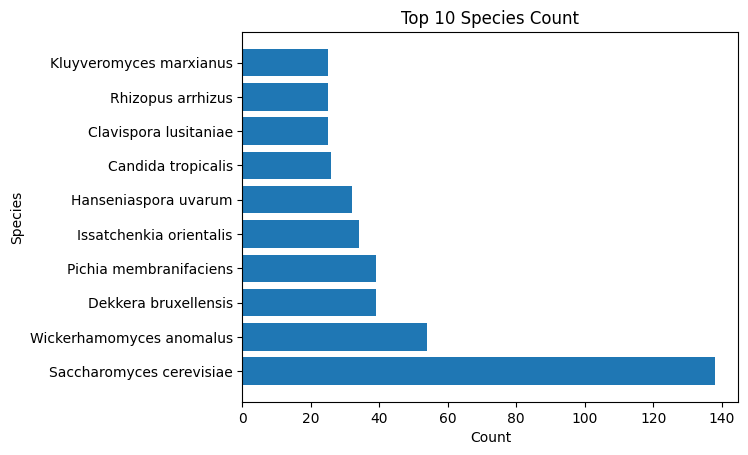

In [4]:
non_zero_cells = fungi_df[fungi_df != 0.0].count()

# Create a list of species names and counts
species_names = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in non_zero_cells.index.tolist()]
# for x in species_names:
#     print(x)
counts = non_zero_cells.tolist()

# Combine species names and counts into a DataFrame
species_counts_df = pd.DataFrame({'Species': species_names, 'Count': counts})

# Filter out the rows with 'Fungi sp' in the species names
species_counts_df = species_counts_df[~species_counts_df['Species'].str.contains('Fungi sp', case=False)]

# Remove leading and trailing spaces from the 'Species' column
species_counts_df['Species'] = species_counts_df['Species'].str.strip()

# Filter out rows with empty 'Species' values
species_counts_df = species_counts_df[species_counts_df['Species'] != '']

# Sort the DataFrame by count in descending order
species_counts_df = species_counts_df.sort_values(by='Count', ascending=False)

# Select only the top 10 species
top_10_species = species_counts_df.head(10)

# Set up the plot
fig, ax = plt.subplots()
ax.barh(top_10_species['Species'], top_10_species['Count'])

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Species')
ax.set_title('Top 10 Species Count')

# Display the plot
plt.show()

beer
Sesotho                     70
Rubi Marzen Lager           51
Extra Doppelbock Lager      46
Sour Flanders Red Ale       24
American Wild Ale           23
Blond Beer (8.88%)          21
Sour Ale                    17
Chimay Red Cap              15
Waldbier 2014 Wienerwald    12
La Fourbe                    8
Name: species, dtype: int64


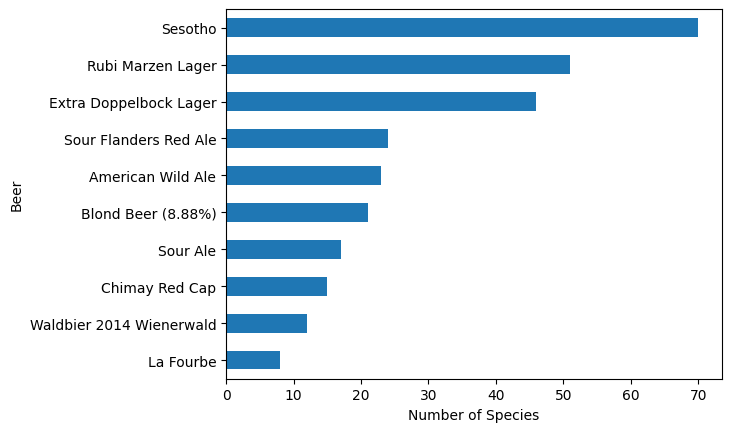

In [5]:
cur_df = fungi_n_beer_df
# Melt the dataframe to have each row represent a unique beer-species pair
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')

# Filter out species with a count of one or less
df_filtered = df_melted[df_melted['count'] > 0]

# Calculate the number of species for each beer
df_species_count = df_filtered.groupby('beer')['species'].nunique()

# Get the top 10 beers with the highest number of species
top_beers = df_species_count.nlargest(10)

# Display the top beers
print(top_beers)

# Plot the top 10 beers with the highest number of species
plt.figure()
top_beers.sort_values().plot(kind='barh')
plt.xlabel('Number of Species')
plt.ylabel('Beer')
plt.savefig('top10_beers_fungal.png',dpi=300, bbox_inches = "tight")
plt.show()

Saccharomyces cerevisiae    138
Wickerhamomyces anomalus     54
Dekkera bruxellensis         39
Pichia membranifaciens       39
Issatchenkia orientalis      34
Hanseniaspora uvarum         32
Candida tropicalis           26
Clavispora lusitaniae        25
Rhizopus arrhizus            25
Kluyveromyces marxianus      25
Name: species, dtype: int64


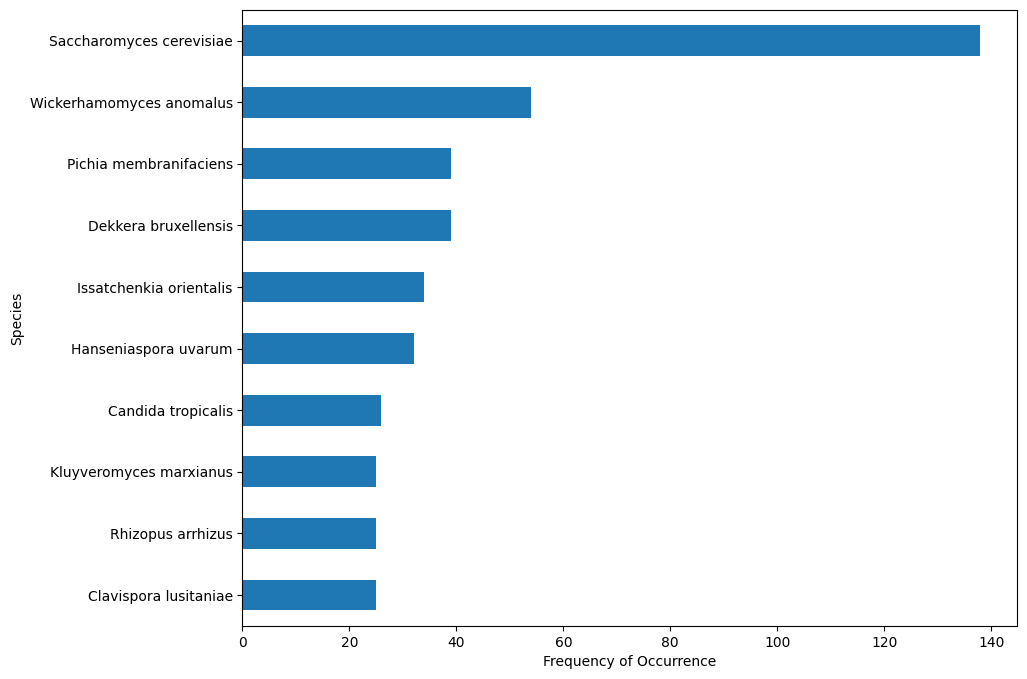

In [20]:
cur_df = fungi_n_beer_df

# Process the column names
cur_df.columns = [label.split(';')[-1].strip()[3:].replace('_', ' ') if label != 'beer' else 'beer' for label in cur_df.columns.tolist()]

# Melt the dataframe to have each row represent a unique beer-species pair
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')

# Remove leading and trailing spaces from the 'species' column
df_melted['species'] = df_melted['species'].str.strip()

# Filter out species with a count of one or less and exclude empty species
df_species_occurrence = df_melted[(df_melted['count'] > 1) & (df_melted['species'] != '')]

# Exclude the species 'fungi_sp'
df_species_occurrence = df_species_occurrence.loc[df_species_occurrence['species'] != 'Fungi sp']

# Calculate the frequency of occurrence for each species
species_frequency = df_species_occurrence['species'].value_counts()

# Get the top 10 species with the highest frequency of occurrence
top_species = species_frequency.nlargest(10)

# Display the top species
print(top_species)

# Plot the top 10 species with the highest frequency of occurrence
plt.figure(figsize=(10, 8))
top_species.sort_values().plot(kind='barh')
plt.xlabel('Frequency of Occurrence')
plt.ylabel('Species')
# plt.title('Top 10 Species with the Highest Frequency of Occurrence')
# plt.savefig('top10_species_fungal.png',dpi=300, bbox_inches = "tight")
plt.show()


Beers with overlap: []
Species with overlap: []
(198, 166)
(198, 167)
(80, 2)
(10, 2)
(1322, 3)
(10,)
['Saccharomyces cerevisiae', 'Wickerhamomyces anomalus', 'Dekkera bruxellensis', 'Pichia membranifaciens', 'Issatchenkia orientalis', 'Hanseniaspora uvarum', 'Candida tropicalis', 'Clavispora lusitaniae', 'Rhizopus arrhizus', 'Kluyveromyces marxianus']


/tmp/ipykernel_29764/3827378765.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
/tmp/ipykernel_29764/3827378765.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = heatmap_data.pivot('species', 'beer', 'count')


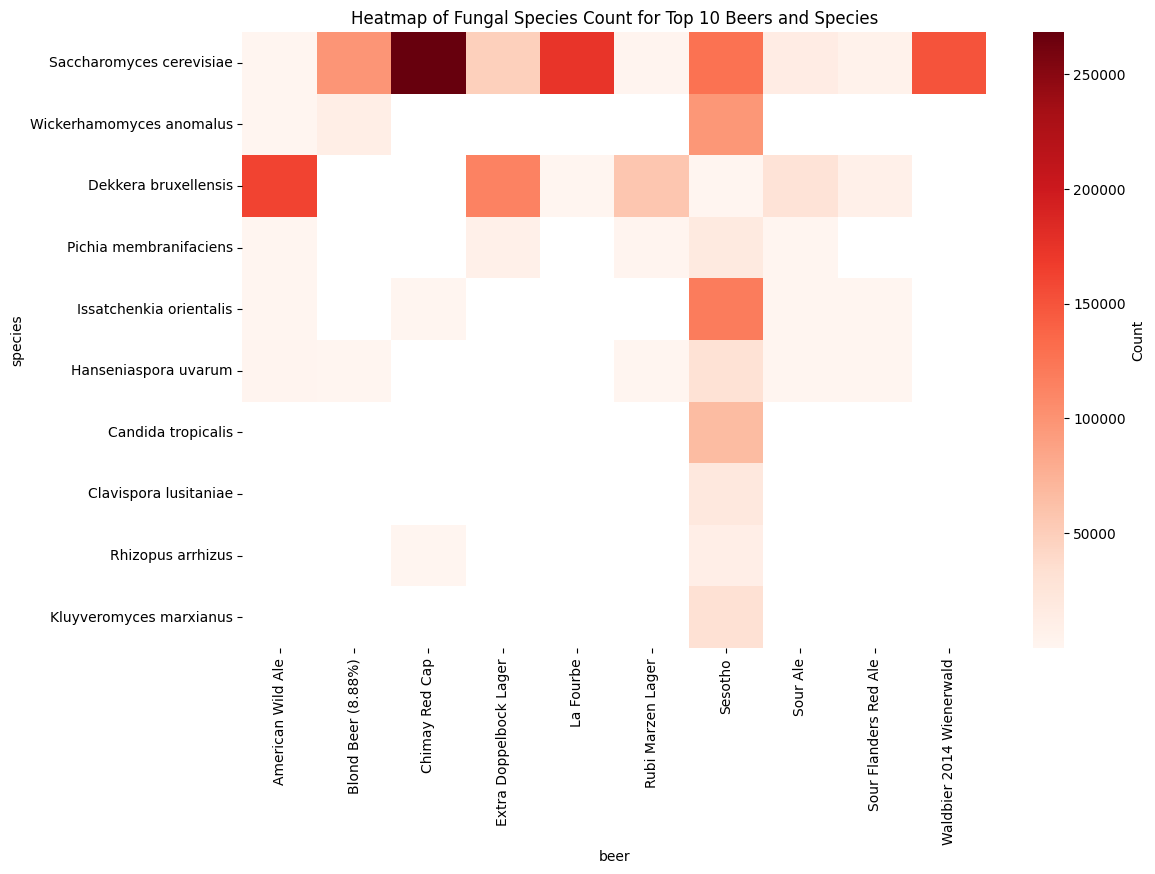

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Processing the data to obtain top 10 fungal species
non_zero_cells = fungi_df[fungi_df != 0.0].count()
species_names = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in non_zero_cells.index.tolist()]
counts = non_zero_cells.tolist()
species_counts_df = pd.DataFrame({'Species': species_names, 'Count': counts})
species_counts_df = species_counts_df[~species_counts_df['Species'].str.contains('Fungi sp', case=False)]
species_counts_df['Species'] = species_counts_df['Species'].str.strip()
species_counts_df = species_counts_df[species_counts_df['Species'] != '']
species_counts_df = species_counts_df.sort_values(by='Count', ascending=False)
top_10_species = species_counts_df.head(10)

# Processing the data to obtain top 10 beers with the most species
cur_df = fungi_n_beer_df
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')
df_filtered = df_melted[df_melted['count'] > 0]
df_species_count = df_filtered.groupby('beer')['species'].nunique()
top_beers = df_species_count.nlargest(10)

# Check if any beers from top_beers have entries in df_filtered with top 10 species
overlap_beers = df_filtered[df_filtered['beer'].isin(top_beers.index) & df_filtered['species'].isin(top_10_species['Species'])]['beer'].unique()
print("Beers with overlap:", overlap_beers)

# Check if any species from top_10_species have entries in df_filtered with top 10 beers
overlap_species = df_filtered[df_filtered['species'].isin(top_10_species['Species']) & df_filtered['beer'].isin(top_beers.index)]['species'].unique()
print("Species with overlap:", overlap_species)

print(fungi_df.shape)
print(fungi_n_beer_df.shape)
print(species_counts_df.shape)
print(top_10_species.shape)
print(df_filtered.shape)
print(top_beers.shape)
# Heatmap for top 10 beers and top 10 species
df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
heatmap_data = df_filtered[df_filtered['beer'].isin(top_beers.index) & df_filtered['species'].isin(top_10_species['Species'])]
heatmap_data = heatmap_data.groupby(['beer', 'species']).sum().reset_index()
heatmap_data = heatmap_data.pivot('species', 'beer', 'count')

# Step 1: Get the species in descending order based on their counts
ordered_species = top_10_species['Species'].tolist()
print(ordered_species)

# Step 2: Reindex the heatmap_data DataFrame
heatmap_data = heatmap_data.reindex(ordered_species)

# Now, plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", cbar_kws={'label': 'Count'})
plt.title('Heatmap of Fungal Species Count for Top 10 Beers and Species')
plt.show()

In [21]:
# Counting the number of beers in which each species appears
species_frequency = (fungi_n_beer_df.iloc[:, 1:] > 0).sum(axis=0)

# Adjust species names similarly as before
species_names_adjusted = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in species_frequency.index.tolist()]
species_frequency_df = pd.DataFrame({'Species': species_names_adjusted, 'Frequency': species_frequency.values})

# Filter out the rows with 'Fungi sp' in the species names
species_frequency_df = species_frequency_df[~species_frequency_df['Species'].str.contains('Fungi sp', case=False)]

# Remove leading and trailing spaces from the 'Species' column
species_frequency_df['Species'] = species_frequency_df['Species'].str.strip()

# Filter out rows with empty 'Species' values
species_frequency_df = species_frequency_df[species_frequency_df['Species'] != '']

# Sort by Frequency and get top 10
top_10_species_frequency = species_frequency_df.sort_values(by='Frequency', ascending=False).head(10)
print(top_10_species_frequency)

                     Species  Frequency
1   Saccharomyces cerevisiae        138
65  Wickerhamomyces anomalus         54
0       Dekkera bruxellensis         39
5     Pichia membranifaciens         39
64   Issatchenkia orientalis         34
33      Hanseniaspora uvarum         32
66        Candida tropicalis         26
73     Clavispora lusitaniae         25
70         Rhizopus arrhizus         25
69   Kluyveromyces marxianus         25


Beers with overlap: []
Species with overlap: []


/tmp/ipykernel_29764/2753550484.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
/tmp/ipykernel_29764/2753550484.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = heatmap_data.pivot('species', 'beer', 'count')


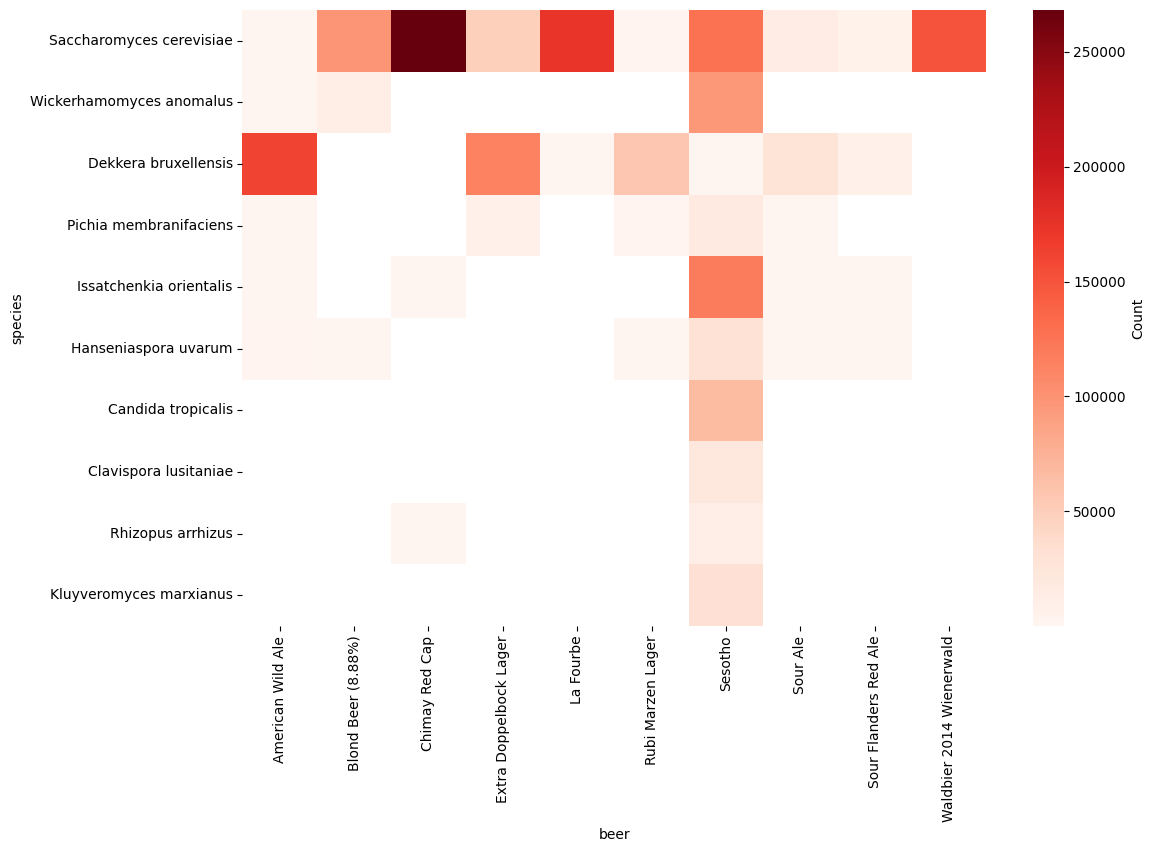

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of beers in which each species appears
species_frequency = (fungi_n_beer_df.iloc[:, 1:] > 0).sum(axis=0)

# Adjust species names similarly as before
species_names_adjusted = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in species_frequency.index.tolist()]
species_frequency_df = pd.DataFrame({'Species': species_names_adjusted, 'Frequency': species_frequency.values})

# Filter out the rows with 'Fungi sp' in the species names
species_frequency_df = species_frequency_df[~species_frequency_df['Species'].str.contains('Fungi sp', case=False)]

# Remove leading and trailing spaces from the 'Species' column
species_frequency_df['Species'] = species_frequency_df['Species'].str.strip()

# Filter out rows with empty 'Species' values
species_frequency_df = species_frequency_df[species_frequency_df['Species'] != '']

# Sort by Frequency and get top 10
top_10_species_frequency = species_frequency_df.sort_values(by='Frequency', ascending=False).head(10)

# Processing the data to obtain top 10 beers with the most species
cur_df = fungi_n_beer_df
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')
df_filtered = df_melted[df_melted['count'] > 0]
df_species_count = df_filtered.groupby('beer')['species'].nunique()
top_beers = df_species_count.nlargest(10)

# Check if any beers from top_beers have entries in df_filtered with top 10 species
overlap_beers = df_filtered[df_filtered['beer'].isin(top_beers.index) & df_filtered['species'].isin(top_10_species_frequency['Species'])]['beer'].unique()
print("Beers with overlap:", overlap_beers)

# Check if any species from top_10_species have entries in df_filtered with top 10 beers
overlap_species = df_filtered[df_filtered['species'].isin(top_10_species_frequency['Species']) & df_filtered['beer'].isin(top_beers.index)]['species'].unique()
print("Species with overlap:", overlap_species)

# Heatmap for top 10 beers and top 10 species
df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
heatmap_data = df_filtered[df_filtered['beer'].isin(top_beers.index) & df_filtered['species'].isin(top_10_species_frequency['Species'])]
heatmap_data = heatmap_data.groupby(['beer', 'species']).sum().reset_index()
heatmap_data = heatmap_data.pivot('species', 'beer', 'count')

# Step 1: Get the species in descending order based on their counts
ordered_species = top_10_species_frequency['Species'].tolist()

# Step 2: Reindex the heatmap_data DataFrame
heatmap_data = heatmap_data.reindex(ordered_species)

# Now, plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", cbar_kws={'label': 'Count'})
plt.savefig('top_fungal.png',dpi=300, bbox_inches = "tight")
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Processing the data to obtain top 10 fungal species based on frequency across beers
non_zero_cells = fungi_df[fungi_df != 0.0].count()
species_names = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in non_zero_cells.index.tolist()]
# Processing the data to obtain top 10 fungal species based on frequency across beers
species_freq_across_beers = (fungi_df > 0).sum(axis=1)  # Summing boolean values to get frequencies

# Since we are directly deriving names from the index of fungi_df, we'll avoid any mismatch
species_names = []
for label in fungi_df.index:
    if isinstance(label, str):
        species_name = label.split(';')[-1].strip()[3:].replace('_', ' ')
        species_names.append(species_name)
    else:
        species_names.append(str(label))
species_counts_df = pd.DataFrame({'Species': species_names, 'Frequency': species_freq_across_beers})
species_counts_df = species_counts_df[~species_counts_df['Species'].str.contains('Fungi sp', case=False)]
species_counts_df['Species'] = species_counts_df['Species'].str.strip()
species_counts_df = species_counts_df[species_counts_df['Species'] != '']
top_10_species_frequency = species_counts_df.sort_values(by='Frequency', ascending=False).head(10)

# Processing the data to obtain top 10 beers with the most species
cur_df = fungi_n_beer_df
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')
df_filtered = df_melted[df_melted['count'] > 0]

df_species_count = df_filtered.groupby('beer')['species'].nunique()
top_beers = df_species_count.nlargest(10)

# Convert counts to binary representation: 1 if present, 0 otherwise
df_filtered['count_binary'] = df_filtered['count'].apply(lambda x: 1 if x > 0 else 0)

# Prepare data for the heatmap
df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
heatmap_data_frequency = df_filtered[df_filtered['beer'].isin(top_beers.index) & df_filtered['species'].isin(top_10_species_frequency['Species'])]
heatmap_data_frequency = heatmap_data_frequency.groupby(['beer', 'species'])['count_binary'].sum().reset_index()
heatmap_data_frequency = heatmap_data_frequency.pivot('species', 'beer', 'count_binary')

# Get the species in descending order based on their frequency
ordered_species = top_10_species_frequency['Species'].tolist()

# Reindex the heatmap_data DataFrame for species order
heatmap_data_frequency = heatmap_data_frequency.reindex(ordered_species)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_frequency, cmap="Reds", cbar_kws={'label': 'Frequency'}, annot=True)  
plt.title('Heatmap of Fungal Species Frequency for Top 10 Beers and Species')
plt.show()


/tmp/ipykernel_29764/1482186956.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['count_binary'] = df_filtered['count'].apply(lambda x: 1 if x > 0 else 0)
/tmp/ipykernel_29764/1482186956.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
/tmp/ipykernel_29764/1482186956.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hea

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>